<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-6)</h1></font>
<font color="#5b5a59"><h2 align="left">Práctica sobre Redes Neuronales</h2></font>

En esta práctica desarrollarás con Keras y TensorFlow varios modelos de redes neuronales de diferente complejidad. 

Todas las respuestas a los ejercicios de la práctica se deben incluir en este mismo notebook, bien completando el código en los lugares indicados, bien respondiendo a las preguntas planteadas. 

*Versión 1, actualizada el 28-05-2021*



### <font color="#CA3532">Instrucciones</font>

- La práctica se realizará de manera individual.

- Sólo debes entregar este notebook con las soluciones a los ejercicios planteados.

- La entrega se realizará a través de la plataforma de Instituto BME antes de que acabe el plazo establecido.

- No olvides incluir tu nombre y apellidos en el siguiente bloque de código.


In [ ]:
# TO-DO: Incluye tu nombre y apellidos aqui:
student_data = {'nombre': 'Ignacio', 'apellidos': 'Bermejo Embid'}

### <font color="#CA3532">Acceso al material de la práctica</font>

La forma más sencilla de acceder a todo el material de la práctica es clonar este repositorio de ``github``:

In [ ]:
!git clone https://github.com/luisferuam/MIAX6

fatal: destination path 'MIAX6' already exists and is not an empty directory.


### <font color="#CA3532">Carga de librerías</font>

La siguiente celda carga todas las librerías necesarias para la práctica. Si necesitas alguna librería adicional inclúyela al final.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX6')
#import dlfbt
from MIAX6 import dlfbt

# Incluye aquí otros imports que necesites
from tensorflow.keras import layers
from tensorflow.keras import initializers

### <font color="#CA3532">Parte I: Modelos sencillos con Keras</font>

Los primeros modelos los haremos con datos generados de manera artificial. La siguiente celda crea un problema de regresión en una dimensión y representa gráficamente ``t`` frente a ``x``:

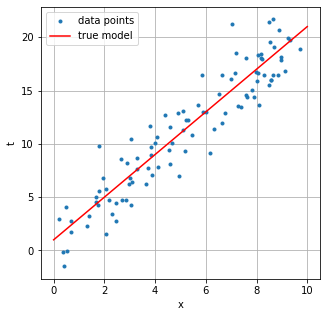

Forma de x: (100, 1)
Forma de t: (100, 1)


In [ ]:
dg = dlfbt.DataGeneratorLinear1D()
dg.create_dataset(seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

#### <font color="#CA3532">Ejercicio 1</font> [1 punto]

Construye en Keras un modelo de regresión lineal para predecir la variable ``t`` a partir de la variable ``x``.

<font color="#CA3532">[1.1]</font> Define del modelo completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
x=dg.x
t=dg.t

#construyo el modelo
model = keras.Sequential()
#meter aqui las capas de las redes neuronales
model.add(keras.layers.Dense(30,input_shape=(1,) ,activation="relu", name="oculta"))
model.add(keras.layers.Dense(1, name="salida"))



#-------------------------------------------------------------

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
oculta (Dense)               (None, 30)                60        
_________________________________________________________________
salida (Dense)               (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[1.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss='mse',
              metrics=['acc'])

#entrenamos el modelo
#------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

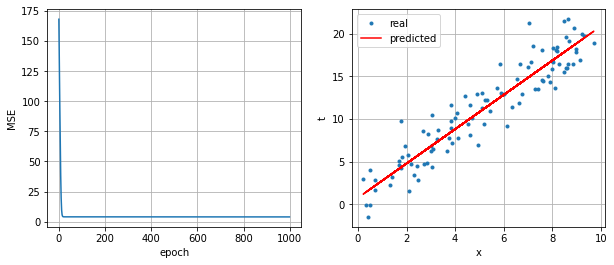

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.x)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.x, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 2</font> [1 punto] 

A continuación vas a resolver un problema de regresión no lineal, también en una dimensión. La siguiente celda crea el problema y representa gráficamente ``t`` frente a ``x``:

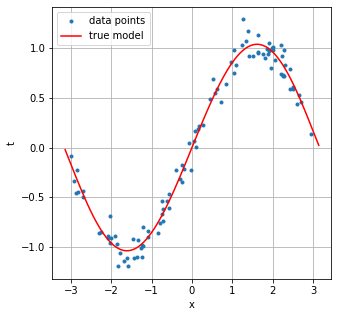

Forma de x: (100, 1)
Forma de t: (100, 1)


In [ ]:
dg = dlfbt.DataGeneratorNonLinear1D(coefs=[0, 1, 0, -0.15, 0, 0.005])
dg.create_dataset(xmin=-3.14, xmax=3.14, noise=0.1, seed=21)
dg.plot_dataset()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[2.1]</font> Define del modelo de regresión completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Dense(30, input_shape=(1,), activation='softmax',name="entrada"))
model.add(keras.layers.Dense(1, name="salida"))
#-------------------------------------------------------------

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (Dense)              (None, 30)                60        
_________________________________________________________________
salida (Dense)               (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[2.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo

####
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1, momentum=0.7),
              loss='mse')
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

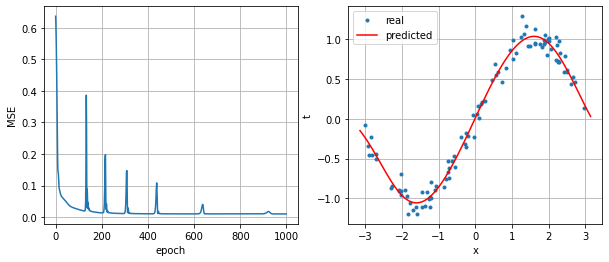

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
y = model.predict(dg.modelx)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.modelx, y, 'r-')
plt.grid(True)
plt.xlabel('x') 
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

#### <font color="#CA3532">Ejercicio 3</font> [1 punto]

Finalmente vamos a plantear un problema de regresión logística. La siguiente celda crea los datos del problema (en dos dimensiones) y representa gráficamente la distribución de ``x`` para las dos clases ``t=0`` y ``t=1``:

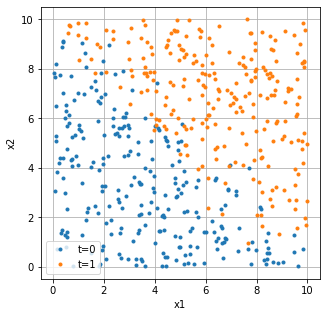

Forma de x: (500, 2)
Forma de t: (500, 1)


In [ ]:
dg = dlfbt.DataGeneratorLogistic(a=[2.0, 2.0], b=-20.0)
dg.create_dataset(n=500, seed=17)

plt.figure(figsize=(5, 5))
ix0 = (dg.t.ravel() == 0)
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.', label='t=0')
ix1 = (dg.t.ravel() == 1)
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.', label='t=1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

print("Forma de x:", dg.x.shape)
print("Forma de t:", dg.t.shape)

<font color="#CA3532">[3.1]</font> Construye en Keras un modelo de regresión logística para predecir la variable ``t`` a partir de la variable ``x``. Define del modelo completando el código de la celda siguiente:

In [ ]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', name='entrada'))
#-------------------------------------------------------------

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[3.2]</font> Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. Añade las opciones necesarias para que se genere, además del ``loss``, la métrica ``accuracy``. El learning rate lo deberás ajustar para que el entrenamiento converja:

In [ ]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

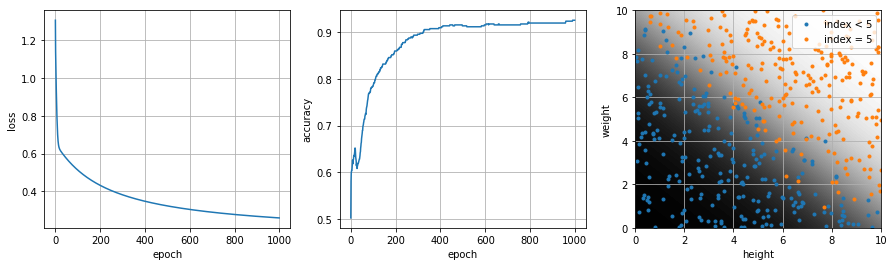

In [ ]:
history = model.fit(dg.x, dg.t, epochs=1000, batch_size=dg.x.shape[0], verbose=0)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')

xx, yy = np.meshgrid(np.arange(0, 10, 0.01), np.arange(0, 10,0.01))
xy = np.concatenate([xx.reshape([-1, 1]), yy.reshape([-1, 1])], axis=1)
z = model.predict(xy)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, z.reshape(xx.shape), 100, cmap="gray")
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], '.')
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], '.')
plt.grid(True)
plt.xlabel('height')
plt.ylabel('weight')
plt.axis([0, 10, 0, 10])
plt.legend(('index < 5', 'index = 5'))

plt.show()

#### <font color="#CA3532">Ejercicio 4</font> [1 punto]

En este ejercicio vas a construir una red neuronal un poco más compleja y la vas a probar con distintos casos de prueba. La red debe tener las siguientes características:

- Una capa de entrada con 54 unidades.
- Dos capas ocultas, con 128 y 64 unidades respectivamente, y activación ``ReLU``. 
- Una capa de salida con 7 unidades ``softmax``. 
- Se debe aplicar ``dropout`` con parámetro 0.2 en las dos capas ocultas.
- Todos los pesos de la red se deben inicializar con el método Xavier (ver transparencias [dffn.pdf](https://drive.google.com/file/d/1D2cK96G9QKnzheQeb3WIupUc73ElLn5p/view?usp=sharing), p. 80).

<font color="#CA3532">[4.1]</font> Completa el código de la siguiente celda con tu solución:


In [ ]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.InputLayer(54, name='entrada'))
#inicializo los pesos a traves del metodo xavier
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2,))
#ocultas, aplicar dropout
model.add(keras.layers.Dense(128, activation='relu', name='oculta', kernel_initializer=initializer))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(64, activation='relu', name='oculta1'))
model.add(tf.keras.layers.Dropout(0.2))
#salida
model.add(keras.layers.Dense(7,activation='softmax' ,name="salida"))
#-------------------------------------------------------------

model.summary()
#-------------------------------------------------------------

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
oculta (Dense)               (None, 128)               7040      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
oculta1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
salida (Dense)               (None, 7)                 455       
Total params: 15,751
Trainable params: 15,751
Non-trainable params: 0
_________________________________________________________________


<font color="#CA3532">[4.2]</font> Si has hecho todo bien, tu modelo debería tener 15751 parámetros entrenables. Explica de dónde sale este número:

<font color="#CA3532">
TO-DO: Incluye aquí tu respuesta.
</font>

El resultado sale de la suma de las iteraciones de todas las capas más la suma del bias, dado que si no sumas el bias el resultado estaría cerca pero no sería el resultado correcto.
(54*128+128)+(128*64+64)+(64*7+7)


#### <font color="#CA3532">Ejercicio 5</font> [1 punto]

A continuación vamos a hacer una serie de pruebas para verificar que tu modelo está bien construido. Para ello vamos a usar los datos del problema de clasificación Forest Covertypes. El problema consiste en predecir el tipo de cubierta vegetal de un terreno a partir de características del mismo como su elevación, su pendiente, etcétera. Los detalles del problema los puedes consultar en estos enlaces:

https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes

https://archive.ics.uci.edu/ml/datasets/Covertype

La siguiente celda carga y prepara los datos:


In [ ]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
x = data.data
t = data.target - 1

A continuación imprimimos la forma de las variables ``x`` e ``y``, así como los valores numéricos de cada una de las 7 clases del problema:

In [ ]:
print(x.shape)
print(t.shape)
print(np.unique(t))

(581012, 54)
(581012,)
[0 1 2 3 4 5 6]


<font color="#CA3532">[5.1]</font> Lo primero que debes hacer es dividir los datos en conjuntos de entrenamiento y test usando la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``scikit-learn``. El conjunto de test debe tener el 30% de los datos. La semilla (``random_state``) se debe fijar al valor 23 para que los resultados sean reproducibles. Utiliza los nombres de variable ``x_train``, ``x_test``, ``t_train`` y ``t_test``.

In [ ]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código para crear los conjuntos de entrenamiento y test
#Train - test
ntrain=400000
x_train=x[:ntrain]
t_train=t[:ntrain]
x_test=x[:ntrain]
t_test=t[:ntrain]
#hago la particion
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=23)
#-------------------------------------------------------------

<font color="#CA3532">[5.2]</font> A continuación estandariza los datos usando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
#-------------------------------------------------------------
# TO-DO: Estandariza los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#-------------------------------------------------------------

<font color="#CA3532">[5.3]</font> En la celda siguiente, compila el modelo usando como optimizador ``SGD`` con un learning rate de ``0.01`` y como función de coste ``cross-entropy``. A continuación carga los pesos del fichero ``random-weights``.

In [ ]:
fichero_pesos = "MIAX6/data/covertype/random-weights"
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código para compilar el modelo y cargar los pesos
#compilo el modelo
model.load_weights(fichero_pesos)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
#-------------------------------------------------------------




Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7fb9fc6a8750> and <tensorflow.python.keras.layers.core.Dropout object at 0x7fba04af1610>).


En la celda siguiente se evalúa el modelo sobre el conjunto de datos. Como tu modelo parte de unos pesos determinados, los resultados deberían ser reproducibles. 

Si has hecho todo bien deberías obtener este resultado (no es demasiado bueno, pero ten en cuenta que el modelo aún no ha sido entrenado):

````
5447/5447 [==============================] - 6s 976us/step - loss: 2.5425 - acc: 0.0699
[2.5424516201019287, 0.06990659981966019]
````

In [ ]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 6s 1ms/step - loss: 2.5425 - acc: 0.0699


[2.5424516201019287, 0.06990659981966019]

Como última prueba vamos a entrenar el modelo durante 10 épocas. Antes de llamar a ``model.fit`` inicializamos las semillas del generador de números aleatorios para que, de nuevo, el resultado sea reproducible.

Si has hecho todo bien, al ejecutar la celda siguiente este debería ser el resultado al final de las 10 épocas:

````
loss: 0.6654 - acc: 0.7201
````

In [ ]:
np.random.seed(19)
tf.random.set_seed(41)
_ = model.fit(x_train, t_train, epochs=10, batch_size=512, shuffle=False)

Epoch 1/10
795/795 [==============================] - 4s 4ms/step - loss: 1.0620 - acc: 0.5956
Epoch 2/10
795/795 [==============================] - 3s 4ms/step - loss: 0.8000 - acc: 0.6689
Epoch 3/10
795/795 [==============================] - 3s 4ms/step - loss: 0.7531 - acc: 0.6872
Epoch 4/10
795/795 [==============================] - 3s 4ms/step - loss: 0.7278 - acc: 0.6969
Epoch 5/10
795/795 [==============================] - 3s 4ms/step - loss: 0.7114 - acc: 0.7033
Epoch 6/10
795/795 [==============================] - 3s 4ms/step - loss: 0.6978 - acc: 0.7085
Epoch 7/10
795/795 [==============================] - 3s 4ms/step - loss: 0.6879 - acc: 0.7132
Epoch 8/10
795/795 [==============================] - 3s 4ms/step - loss: 0.6784 - acc: 0.7154
Epoch 9/10
795/795 [==============================] - 3s 4ms/step - loss: 0.6719 - acc: 0.7180
Epoch 10/10
795/795 [==============================] - 3s 4ms/step - loss: 0.6654 - acc: 0.7201


Y al evaluar el modelo sobre el conjunto de test te debería salir esto:

````
5447/5447 [==============================] - 6s 1ms/step - loss: 0.6210 - acc: 0.7369
[0.6210317015647888, 0.7369194030761719]
````

In [ ]:
model.evaluate(x_test, t_test)

5447/5447 [==============================] - 6s 1ms/step - loss: 0.6210 - acc: 0.7369


[0.6210323572158813, 0.7369021773338318]

### <font color="#CA3532">Parte II: TensorFlow</font>

En los siguientes ejercicios trabajaremos directamente con TensorFlow, sin Keras.

#### <font color="#CA3532">Ejercicio 6</font> [1 punto] 

En primer lugar vamos a construir un modelo de regresión lineal. Completa el código de la clase ``LinearRegressionModel_TF`` rellenando todos los bloques marcados con un ``TO-DO``. Ten en cuenta que no es necesario calcular los gradientes explicitamente, pues pueden ser extraidos del *gradient tape*.

In [ ]:
class LinearRegressionModel_TF(object):

    def __init__(self, d=2):
        # Initialize weights and bias:
        self.w = tf.Variable(tf.random.normal(shape=[d, 1], dtype=tf.dtypes.float64))  
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.dtypes.float64)) 
        
    def predict(self, x):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the model output y
        # Note that:
        # - x is a Nxd tensor, with N the number of patterns and d the dimension
        #   (number of features)
        # - y must be a Nx1 tensor
        #-----------------------------------------------------------------------
        y=tf.matmul(x, self.w) + self.b
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return y

    def compute_gradients(self, x, t):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the gradients db and dw of the loss function 
        # with respect to b and w
        # Note that:
        # - x is a Nxd tensor, with N the number of patterns and d the dimension
        #   (number of features)
        # - t is a Nx1 tensor
        # - y is a Nx1 tensor
        # - The gradient db (eq. dw) must have the same shape as b (eq. w) 
        #-----------------------------------------------------------------------
        with tf.GradientTape() as tape: #error en esta linea 
          loss=self.get_loss(x,t)
        [dw, db]=tape.gradient(loss,[self.w, self.b])
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------
        
        return db, dw
        
    def gradient_step(self, x, t, eta):
        db, dw = self.compute_gradients(x, t)
        
        #-----------------------------------------------------------------------
        # TO-DO block: Update the model parameters b and w
        #-----------------------------------------------------------------------
        b1=self.b-eta*db
        self.b.assign(b1)
        w1=self.w-eta*dw
        self.w.assign(w1)
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

    def fit(self, x, t, eta, num_iters):
        loss = np.zeros(num_iters)
        for i in range(num_iters):
            self.gradient_step(x, t, eta)
            loss[i] = self.get_loss(x, t).numpy()
        return loss

    def get_loss(self, x, t):
        y = self.predict(x)
        loss = tf.reduce_mean(0.5*(y - t)*(y - t))
        return loss

Puedes ejecutar las siguientes pruebas para comprobar tu implementación.

Test para el método ``predict``:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

y = linrm.predict(dg.x)
print(y.shape)                    # Should be (500, 1)
print(np.abs(y - dg.t).max())     # Should be 0 or close to 0 
print(linrm.get_loss(dg.x, dg.t)) # Should be 0 or close to 0 

(500, 1)
0.0
tf.Tensor(0.0, shape=(), dtype=float64)


Test para el método ``compute_gradients``:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

db, dw = linrm.compute_gradients(dg.x, dg.t)
print(db.shape) # Should be (1, 1)
print(db)       # Should be [[-0.00704326]] approx
print(dw.shape) # Should be (4, 1)
print(dw)       # Should be [[-0.05353578]
                #            [-0.03276935]
                #            [-0.00337341]
                #            [-0.03293776]] approx

(1, 1)
tf.Tensor([[-0.00704326]], shape=(1, 1), dtype=float64)
(4, 1)
tf.Tensor(
[[-0.05353578]
 [-0.03276935]
 [-0.00337341]
 [-0.03293776]], shape=(4, 1), dtype=float64)


Test para el método ``fit``:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_TF(2)
linrm.w = tf.Variable([[-2.0], [-2.0]], dtype=tf.dtypes.float64)
linrm.b = tf.Variable([[-3.0]], dtype=tf.dtypes.float64)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)
print(loss[-1]) # Should be 2.660068435196912 approx

2.660068435196912


Gráfica de loss frente a número de iteraciones:

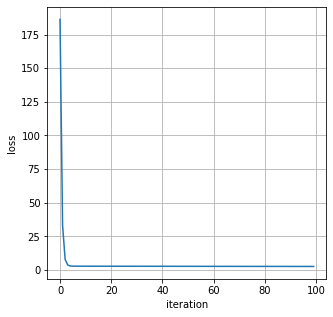

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Gráfica de predicciones frente a objetivos (debería estar distribuída a lo largo de la recta $y=x$):

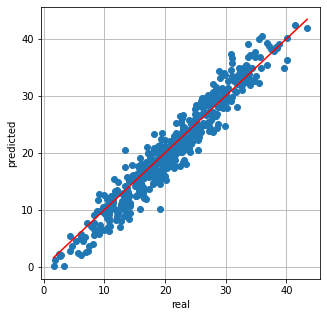

In [ ]:
y = linrm.predict(dg.x)
plt.figure(figsize=(5, 5))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

#### <font color="#CA3532">Ejercicio 7</font> [1 punto] 

A continuación vamos a construir una red neuronal completa. Igual que antes, debes completar el código de la clase ``NeuralNetwork_TF`` rellenando todos los bloques marcados con un ``TO-DO``. 


In [ ]:
class NeuralNetwork_TF(object):
    #---------------------------------------------------------------------------
    # MSE loss:
    #---------------------------------------------------------------------------
    def mse_loss(y, t):
        loss = 0.5*tf.reduce_mean(tf.pow(y-t, 2.0))
        return loss

    #---------------------------------------------------------------------------
    # Cross-entropy loss:
    #---------------------------------------------------------------------------
    def cross_entropy_loss(y, t):
        loss = -tf.reduce_mean(t*tf.math.log(y) + (1.-t)*tf.math.log(1.-y))
        return loss
     
    #---------------------------------------------------------------------------
    # The constructor receives a list of tuples of the form (n, a), one tuple 
    # for each layer, where n is the number of units in the layer and a is the 
    # activation of the layer. You may use any TensorFlow activation. In 
    # particular:
    #
    # - tf.sigmoid: sigmoid activation function 
    # - tf.identity: identity activation function (to implement a linear layer) 
    # 
    # The activation function is ignored for the input layer.
    # 
    # The minimum is two layers (input and output).
    # The default value is layers=[(2, None), (1, tf.sigmoid)].
    # The output layer must have one single neuron.
    #---------------------------------------------------------------------------
    def __init__(self, layers=[(2, None), (1, tf.sigmoid)]):
        # Network weights and activations:
        self.nlayers = len(layers) - 1
        self.W = []
        self.b = []
        self.a = []
        for l0, l1 in zip(layers[:-1], layers[1:]):
            self.W.append(tf.Variable(tf.random.normal(shape=[l1[0], l0[0]], dtype=tf.dtypes.float64)))
            self.b.append(tf.Variable(tf.random.normal(shape=[l1[0], 1], dtype=tf.dtypes.float64)))
            self.a.append(l1[1])
            
    #---------------------------------------------------------------------------
    # Implementation of the forward pass, compute the network output y given the
    # input x.
    #
    # Input: x is a tensor of dimension dxN, with N the number of patterns 
    #        and d the dimension (number of features).
    # 
    # Return: the activation y in the last layer, which must be a tensor of 
    #         dimension 1xN.
    #---------------------------------------------------------------------------
    def predict(self, x):
        #-----------------------------------------------------------------------
        # TO-DO block: loop in the network layers computing the activations. 
        # The activation of the last layer should be stored at variable y to
        # be returned.
        #-----------------------------------------------------------------------
        
        #for w, b in zip(self.w[:-1], self.b[:,-1]):
        for w, B, A in zip(self.W[:-1], self.b[:-1], self.a[:-1]):
          z= tf.matmul(w,x) + B
          y = A(z)
          x=y

        z=tf.matmul(self.W[-1], x) + self.b[-1]
        activacion=self.a[-1]
        y=activacion(z)
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------
                  
        return y
    
    #---------------------------------------------------------------------------
    # Implementation of the backward pass, compute the gradients of the loss
    # function with respect to all the weights and biases using the TensorFlow
    # GradientTape. 
    #
    # Note that the gradient tape must be persistent as many gradients must be
    # computed. 
    #
    # Input: x is a tensor of dimension dxN, with N the number of patterns 
    #        and d the dimension (number of features).
    #        t is a tensor of dimension 1xN, with N the number of patterns.
    # 
    # Return: dW is a list with the gradients of the loss function with respect 
    #         to the weights of each layer
    #         db is a list with the gradients of the loss function with respect 
    #         to the biases of each layer
    #---------------------------------------------------------------------------
    def compute_gradients(self, x, t, loss_function):
        #-----------------------------------------------------------------------
        # TO-DO block: compute the gradients db, dW
        #-----------------------------------------------------------------------
        with tf.GradientTape(persistent=True) as tape: #se me jode aqui
          #y = self.predict(x)
          loss= loss_function(x, t, loss_function)
          dW=[]
          db=[]

        for B, W in zip (self.b, self.w):
          [db1, dw1]=tape.gradient(loss, [W, B])
          #db1=tape.gradient(loss, B)
          #dw1=tape.gradient(loss, W)
          #dW.append(dw1)
          #db.append(db1)
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return db, dW
        
    #---------------------------------------------------------------------------
    # Gradient step:
    #---------------------------------------------------------------------------
    def gradient_step(self, x, t, eta, loss_function):
        dB, dW = self.compute_gradients(x, t, loss_function)

        #-----------------------------------------------------------------------
        # TO-DO block: Loop in layers updating the model parameters b and w
        #-----------------------------------------------------------------------
        for i in range(0, self.nlayers):
          self.b[i].assign(self.b[i]-eta*dB[i])
          self.w[i].assign(self.w[i]-eta*dW[i])
        #for b,w in zip(self.b, self.w):
         #self.b[i].assing(self.b[i]-eta*dB[i])
          #self.w[i].assing(self.w[i]-eta*dW[i])
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

    #---------------------------------------------------------------------------
    # Fit the model parameters to the training data x, t.
    # Return the loss at each training epoch.
    #---------------------------------------------------------------------------
    def fit(self, x, t, eta, num_epochs, batch_size, loss_function, verbose=False):
        (dim, n) = x.shape
        num_batches = (n // batch_size) + ((n % batch_size) != 0)
 
        loss = np.zeros(num_epochs)
        for i in range(num_epochs):
            # Shuffle data and generate batches:
            ix = np.random.permutation(n)
            for j in range(num_batches):
                imin = j*batch_size
                imax = np.minimum((j+1)*batch_size, n)
                
                ibatch = ix[imin:imax]
                batch_x = x[:, ibatch]
                batch_t = t[:, ibatch]
                self.gradient_step(batch_x, batch_t, eta, loss_function)

            # Calculo el loss de la epoca con todos los datos:
            loss[i] = self.get_loss(x, t, loss_function).numpy()
            # Print:
            if verbose:
                print("Epoch %d -- loss %f" % (i, loss[i]))
        return loss

    #---------------------------------------------------------------------------
    # Compute loss:
    #---------------------------------------------------------------------------
    def get_loss(self, x, t, loss_function):
        y = self.predict(x)
        return loss_function(y, t)

Puedes ejecutar las siguientes pruebas para chequear tu implementación.

Método ``predict``:

In [ ]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.sigmoid)])
y = net.predict(x)

# Tensor shape, should be (1, 20)
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX6/test_nn_tf_predict.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y - yexp)))

(1, 20)
0.0


Método ``compute_gradients``:

In [ ]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)
t = np.random.randn(1, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.identity)])
db, dW = net.compute_gradients(x, t, NeuralNetwork_TF.mse_loss)

# Array shapes, should be:
# (10, 3)
# (10, 1)
# (1, 10)
# (1, 1)
for dwp, dbp in zip(dW, db):
    print(dwp.shape)
    print(dbp.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX6/test_nn_tf_compute_gradients.pickle', 'rb') as handle:
    [dWexp, dbexp] = pickle.load(handle)

for dwp, dbp, dwe, dbe in zip(dW, db, dWexp, dbexp):
    print(np.max(np.abs(dwp - dwe)))
    print(np.max(np.abs(dbp - dbe)))

TypeError: ignored

Método ``fit`` (problema de regresión):

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=1000, seed=17, noise=1.0)
x = dg.x.transpose()
t = dg.t.transpose()

np.random.seed(23)
tf.random.set_seed(23)
net = NeuralNetwork_TF([(2, None), (1, tf.identity)])
loss = net.fit(x, t, 0.01, 100, 1000, NeuralNetwork_TF.mse_loss)
y = net.predict(x)

# Array shape, should be (1, 1000):
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX6/test_nn_tf_fit.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y - yexp)))

Plot loss versus epoch:

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot predictions versus targets (should distribute along $y=x$):

In [ ]:
y = net.predict(x).numpy().transpose()
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

### <font color="#CA3532">Parte III: Optimización de hiperparámetros</font>


En esta parte de la práctica vamos a seguir trabajando con la base de datos de Forest Covertypes. Los datos deberían estar cargados en las variables ``x_train``, ``x_test``, ``t_train`` y ``t_test``:

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

#### <font color="#CA3532">Ejercicio 8</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con [Keras Tuner](https://keras-team.github.io/keras-tuner/documentation/tuners/). Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Algún parámetro de regularización. 
- Optimizador.

Completa el código de las celdas siguientes en los lugares indicados, sin cambiar el nombre de la carpeta de logs.



In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 102kB 6.6MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


<font color="#CA3532">[8.1]</font> Define el hipermodelo:

In [ ]:
def model_builder(hp):
  #-------------------------------------------------------------
  # TO-DO: Incluye aquí los hiperparámetros a optimizar y sus posibles
  # valores. Como ejemplo se muestra el learning rate
  hp_lambda = hp.Choice('lambda', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) 
  hp_lr = hp.Choice('lr', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) 
  #-------------------------------------------------------------
  
  model = keras.Sequential()
  #-------------------------------------------------------------
  # TO-DO: Completa la definición del modelo añadiendo las capas necesarias
  
  #-------------------------------------------------------------
  
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(54,)))
  model.add(keras.layers.Dense(units = 50, activation = 'relu', kernel_regularizer=keras.regularizers.l2(hp_lambda)))
  model.add(keras.layers.Dense(10, activation="softmax"))

  #-------------------------------------------------------------
  # TO-DO: Compila el modelo
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr), 
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])  

  #-------------------------------------------------------------
  
  return model

Borrado de la carpeta de logs:

In [ ]:
!rm -rf logs-proyecto/keras_tuner

Creación de un ``tuner`` de tipo ``Hyperband`` que usa el hipermodelo anterior. El objetivo a optimizar es la precisión (accuracy) sobre el conjunto de validación. El máximo número de épocas es 10.

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_acc', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'logs-proyecto/keras_tuner',
                     project_name = 'kt')  

Resumen del espacio de búsqueda. Comprueba que contiene todos los valores a considerar para cada uno de los hiperparámetros.

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
lambda (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
lr (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}


<font color="#CA3532">[8.2]</font> Divide el conjunto de entrenamiento, de manera aleatoria, en dos subconjuntos. El primero, ``(tr_data, tr_labels)`` contendrá el 70% de los datos y lo usaremos para entrenar los hipermodelos. El segundo, ``(val_data, val_labels)`` contendrá el 30% de los datos y lo usaremos para validar los hipermodelos. Puedes usar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``sklearn.model_selection``.

In [ ]:
#-------------------------------------------------------------
# TO-DO: Genera los subconjuntos de datos (tr_data, tr_labels) y 
# (val_data, val_labels)
tr_data, val_data, tr_labels, val_labels = train_test_split(x_train, t_train, test_size=0.7, random_state=20, stratify=t_train)
#-------------------------------------------------------------

<font color="#CA3532">[8.3]</font> Realiza la búsqueda de los hiperparámetros llamando a ``tuner.search`` usando los datos ``tr_data``, ``tr_labels`` como conjunto de entrenamiento y los datos ``val_data``, ``val_labels`` como conjunto de validación: 

In [ ]:
#-------------------------------------------------------------
# TO-DO: Realiza la búsqueda de los hiperparámetros
#VER NOTEBOOK 10
tuner.search(tr_data, tr_labels,
             epochs=1,
             validation_data=(val_data, val_labels))
#-------------------------------------------------------------

Trial 12 Complete [00h 00m 41s]
val_acc: 0.7212570309638977

Best val_acc So Far: 0.7557956576347351
Total elapsed time: 00h 07m 05s

Search: Running Trial #13

Hyperparameter    |Value             |Best Value So Far 
lambda            |0.0001            |0.0001            
lr                |0.001             |0.001             
tuner/epochs      |4                 |2                 
tuner/initial_e...|2                 |0                 
tuner/bracket     |2                 |2                 
tuner/round       |1                 |0                 
tuner/trial_id    |532f111d837688e...|None              

Epoch 3/4
3805/3813 [============================>.] - ETA: 0s - loss: 0.6823 - acc: 0.7198

KeyboardInterrupt: ignored

<font color="#CA3532">[8.4]</font> Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test.

In [ ]:
#-------------------------------------------------------------
# TO-DO: Selecciona los mejores hiperparámetros, reentrena el modelo con todos
# los datos y aplícalo al conjunto de test
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.fit(tr_data, tr_labels, epochs = 10, validation_data = (val_data, val_labels))
#-------------------------------------------------------------

In [ ]:
print(best_hps)

#### <font color="#CA3532">Ejercicio 9</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con el 
[HParams Dashboard](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams) de ``tensorboard`` y usando una validación cruzada de 5 *folds*. Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Algún parámetro de regularización. 
- Optimizador.

Completa el código de las celdas siguientes en los lugares indicados.

In [ ]:
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import StratifiedKFold

<font color="#CA3532">[9.1]</font> Define el hipermodelo. Recuerda que debes hacer validación cruzada de ``5-folds`` y que la métrica ``accuracy`` se debe calcular como un promedio sobre las 5 particiones de validación.  

In [ ]:
def train_test_model(hparams):

  # Validación cruzada de 5-folds
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

  # Bucle en folds:
  mean_accuracy = 0.0
  for itrain, itest in kfold.split(x_train, t_train):
    model = keras.Sequential([
    #-------------------------------------------------------------
    # TO-DO: Completa la definición del modelo añadiendo las capas necesarias
      
    #-------------------------------------------------------------
      tf.keras.layers.Flatten(input_shape=(54,)),
      tf.keras.layers.Dense(hparams['num_units'], activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(hparams['lambda'])),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)                       
    ])
    #-------------------------------------------------------------
    # TO-DO: Compila el modelo
    
    #-------------------------------------------------------------
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hparams['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    #-------------------------------------------------------------
    # TO-DO: Entrena el modelo usando los índices itrain
    
    #-------------------------------------------------------------
    model.fit(x_train[itrain], t_train[itrain], epochs=3) 
    #-------------------------------------------------------------
    # TO-DO: Evalúa el modelo usando los índices itest y calcula el accuracy
    _, acc = model.evaluate(x_train[itest], t_train[itest])
    #-------------------------------------------------------------
    
    # Acumulamos el accuracy:
    mean_accuracy += acc
  
  return mean_accuracy/5.0

Función para ejecutar las pruebas con un hipermodelo:

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams) 
    accuracy = train_test_model(hparams)
    tf.summary.scalar('accuracy', accuracy, step=1)

Borrado de la carpeta de logs:

In [ ]:
!rm -rf logs-proyecto/hparam

<font color="#CA3532">[9.2]</font> Ejecuta los hipermodelos en bucle:

In [ ]:
session_num = 0

#-------------------------------------------------------------
# TO-DO: Crea el bucle que genera y evalúa los hipermodelos. A modo de 
# ejemplo se incluye un bucle para num_units
for num_units in [32, 64, 96, 128]:
  for llambda in [0.001, 0.0001]:
    for lr in [1.0, 0.1, 0.01, 0.001]:
      hparams = {
          'num_units': num_units,
          'lambda': llambda,
          'learning_rate': lr,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print(hparams)
      run('logs/hparam_tuning_v3/' + run_name, hparams)
      session_num += 1
#-------------------------------------------------------------

--- Starting trial: run-0
{'num_units': 32, 'lambda': 0.001, 'learning_rate': 1.0}
Epoch 1/3
10168/10168 [==============================] - 14s 1ms/step - loss: 2.1324 - accuracy: 0.4546
Epoch 2/3
10168/10168 [==============================] - 13s 1ms/step - loss: 1.2660 - accuracy: 0.4548
Epoch 3/3
2542/2542 [==============================] - 2s 919us/step - loss: 1.2879 - accuracy: 0.4886
Epoch 1/3
10168/10168 [==============================] - 14s 1ms/step - loss: 2.1262 - accuracy: 0.4543
Epoch 2/3
10168/10168 [==============================] - 13s 1ms/step - loss: 1.2667 - accuracy: 0.4553
Epoch 3/3
2542/2542 [==============================] - 2s 902us/step - loss: 1.3847 - accuracy: 0.4886
Epoch 1/3
10168/10168 [==============================] - 14s 1ms/step - loss: 1.8719 - accuracy: 0.4574
Epoch 2/3
10168/10168 [==============================] - 13s 1ms/step - loss: 1.2662 - accuracy: 0.4542
Epoch 3/3
2542/2542 [==============================] - 2s 927us/step - loss: 1.2518 - a

KeyboardInterrupt: ignored

Usa [tensorboard dev](https://tensorboard.dev/) para subir los logs generados a la nube (tendrás que autorizar a google para que publique los datos en tu cuenta). 

In [ ]:
!tensorboard dev upload --logdir logs-proyecto/hparam --name "Ejercicio 9" \
    --description "Comparación de hiperparámetros" --one_shot

2021-06-20 15:57:17.832108: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs-proyecto/hparam

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

Tras ejecutar la celda anterior obtendrás un enlace para acceder al tensorboard con los resultados de tus pruebas. Copia el enlace a continuación para que pueda revisar las pruebas que has realizado.

In [ ]:
#-------------------------------------------------------------
# TO-DO: Copia el enlace a tu TensorBoard, por ejemplo
https://tensorboard.dev/experiment/S6eHBD7JToaomCycY6CNcA/#scalars
#-------------------------------------------------------------

<font color="#CA3532">[9.3]</font> Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test.

In [ ]:
#-------------------------------------------------------------
# TO-DO: Selecciona los mejores hiperparámetros, reentrena el modelo con todos
# los datos y aplícalo al conjunto de test

#VER NOTEBOOK 11 PARA HACERLO
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)
model.fit(tr_data, tr_labels, epochs = 10, validation_data = (val_data, val_labels))
#-------------------------------------------------------------

### <font color="#CA3532">Parte IV: Redes neuronales aplicadas a un problema real</font>

El objetivo de esta parte de la práctica es obtener el mejor modelo posible para el problema Forest Covertypes.

#### <font color="#CA3532">Ejercicio 10</font> [1 punto]

Entrena un modelo para el problema Forest Covertypes.

Entrena una red neuronal para el problema Forest Covertypes. El modelo se debe entrenar y validar usando sólo los datos de training, y posteriormente se deben evaluar los resultados del mismo sobre el conjunto de test. Se valorarán, entre otras cosas, los siguientes puntos:

El análisis inicial del problema y el tratamiento inicial de los datos.

La correcta selección de los hiperparámetros del modelo y la validación de los resultados.

Los resultados obtenidos sobre el conjunto de test, así como la visualización e interpretación de los mismos.

Las conclusiones finales.

In [ ]:
#Base de datos Forest Covertypes
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)


(406708, 54)
(174304, 54)
(406708,)
(174304,)


In [ ]:
#Analisis del problema. Cogemos dos conjuntos de datos los cuales trateremos y seleccionaremos los mejores hiperparametros que nos ofrece el modelo.
#Este modelo lo entrenaremos sobre el conjunto de datos wl cual nos proporcionara la mejor precision. 

def constructor(hp):
  #-------------------------------------------------------------
  # TO-DO: Incluye aquí los hiperparámetros a optimizar y sus posibles
  # valores. Como ejemplo se muestra el learning rate
  h_lambda = hp.Choice('lambda', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) 
  h_learningrate = hp.Choice('lr', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) 
  #-------------------------------------------------------------
  
  model = keras.Sequential()
  #-------------------------------------------------------------
  # TO-DO: Completa la definición del modelo añadiendo las capas necesarias
  
  #-------------------------------------------------------------
  
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(54,)))
  model.add(keras.layers.Dense(units = 50, activation = 'relu', kernel_regularizer=keras.regularizers.l2(h_lambda)))
  model.add(keras.layers.Dense(10, activation="softmax"))

  #-------------------------------------------------------------
  # TO-DO: Compila el modelo
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=h_learningrate), 
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])  

  #-------------------------------------------------------------
  
  return model

In [ ]:
##Borro los logs
!rm -rf logs-proyecto/keras_tuner

In [ ]:
##Optimizo la precision sobre la validacion
tuner = kt.Hyperband(constructor,
                     objective = 'val_acc', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'logs-proyecto/keras_tuner',
                     project_name = 'ejercicio_10')  

In [ ]:
#parto el modelo en varios subconjuntos unos para entrenarlos y otros para su validacion
train_data, val_data, train_labels, val_labels = train_test_split(x_train, t_train, test_size=0.7, random_state=20, stratify=t_train)

In [ ]:
#compruebo que tiene todos los datos para cada uno de los hiperparametros
tuner.search_space_summary()

Search space summary
Default search space size: 2
lambda (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
lr (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
#Busco los hiperparametros con Truner
tuner.search(train_data, train_labels,
             epochs=1,
             validation_data=(val_data, val_labels))

Trial 30 Complete [00h 02m 22s]
val_acc: 0.6694719791412354

Best val_acc So Far: 0.7782511711120605
Total elapsed time: 00h 35m 04s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#Selecciono los mejores hiperparametros y reentreno
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.fit(train_data, train_labels, epochs = 10, validation_data = (val_data, val_labels))

Epoch 1/10
3813/3813 [==============================] - 16s 4ms/step - loss: 0.6840 - acc: 0.7187 - val_loss: 0.6122 - val_acc: 0.7409
Epoch 2/10
3813/3813 [==============================] - 16s 4ms/step - loss: 0.5886 - acc: 0.7498 - val_loss: 0.5768 - val_acc: 0.7554
Epoch 3/10
3813/3813 [==============================] - 16s 4ms/step - loss: 0.5652 - acc: 0.7595 - val_loss: 0.5604 - val_acc: 0.7642
Epoch 4/10
3813/3813 [==============================] - 12s 3ms/step - loss: 0.5507 - acc: 0.7664 - val_loss: 0.5480 - val_acc: 0.7675
Epoch 5/10
3813/3813 [==============================] - 16s 4ms/step - loss: 0.5399 - acc: 0.7699 - val_loss: 0.5384 - val_acc: 0.7710
Epoch 6/10
3813/3813 [==============================] - 12s 3ms/step - loss: 0.5330 - acc: 0.7741 - val_loss: 0.5320 - val_acc: 0.7744
Epoch 7/10
3813/3813 [==============================] - 16s 4ms/step - loss: 0.5257 - acc: 0.7776 - val_loss: 0.5292 - val_acc: 0.7769
Epoch 8/10
3813/3813 [==============================] -

In [ ]:
print(best_hps)

PONER LAS CONCLUSIONES FINALES